# 융합전자공학부 2015003654 이호영

### Load MNIST dataset from PyTorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../data', 
                                           train=True, 
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='../data', 
                                          train=False, 
                                          download=True)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Data type conversion

In [ ]:
# Change data type : torch.Tensor -> numpy array
X_train = train_dataset.train_data.numpy()
y_train = train_dataset.train_labels.numpy()

X_test = test_dataset.test_data.numpy()
y_test = test_dataset.test_labels.numpy()

print('Data size (train): ' + str(X_train.shape))
print('Data size (test): ' + str(X_test.shape))

_, height, width = X_train.shape
dim = height * width

Data size (train): (60000, 28, 28)
Data size (test): (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
index_0 = np.where(y_train == 0)
index_1 = np.where(y_train == 1)
index_all = np.sort(np.concatenate((index_0,index_1),axis = None))
X_train_01 = X_train[index_all]
y_train_01 = y_train[index_all]
y_train_01[y_train_01 == 0] = -1

index_0 = np.where(y_test == 0)
index_1 = np.where(y_test == 1)
index_all = np.sort(np.concatenate((index_0,index_1),axis = None))
X_test_01 = X_test[index_all]
y_test_01 = y_test[index_all]
y_test_01[y_test_01 == 0] = -1

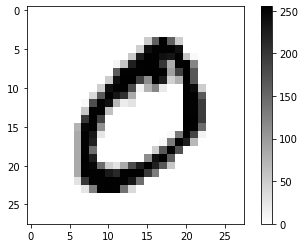

In [ ]:
plt.imshow(X_train_01[0],cmap = 'gray_r')
plt.colorbar()
plt.show()

In [ ]:
X_train_01 = X_train_01.reshape(-1,dim)
X_train_01 = np.hstack([X_train_01,np.ones((len(y_train_01),1))])
#X_train_01 = np.concatenate((X_train_01,np.ones((len(y_train_01),1))),axis=0)

X_test_01 = X_test_01.reshape(-1,dim)
X_test_01 = np.hstack([X_test_01,np.ones((len(y_test_01),1))])

print(X_train_01.shape)
print(X_test_01.shape)

(12665, 785)
(2115, 785)


In [ ]:
def train_perceptron(X, y, w, learning_rate = 1e-3):
  # X: data matrix
  # y: class labels of images in X
  # w: model parameters

  # nb_changes: the number of parameter changes/updates.
  # equivalent to the number of misclassified images/
  nb_changes = 0

  # ------ Fill in here --------------
  for i in range(X.shape[0]):
    if(np.dot(w,X[i])*y[i]<=0):
      w = w + y[i] * X[i] * learning_rate
      nb_changes +=1
  # ----------------------------------

  return w, nb_changes

In [ ]:
nb_epochs_max = 100
w = np.random.randn(dim+1)
# w = np.zeros(dim+1)
train_num = len(X_train_01)
test_num = len(X_test_01)

# ------------ Fill in here -------------
for i in range(nb_epochs_max):
  w,nb_changes = train_perceptron(X_train_01,y_train_01,w,learning_rate=1e-3)
  
  y_pred = ((X_train_01 @ w) >= 0) * 2 - 1
  train_error = np.sum(y_train_01 != y_pred) / train_num *100

  y_pred = (np.matmul(X_test_01 , w) >= 0) * 2 - 1
  test_error = np.sum(y_test_01 != y_pred) / test_num *100
  print(f"epoch {i} nb_changes {nb_changes} train_error {train_error:.2f}% test_error {test_error:.2f}%")

  if(nb_changes ==0):
    break

# --------------------------------------



epoch 0 nb_changes 46 train_error 0.56% test_error 0.43%
epoch 1 nb_changes 27 train_error 0.09% test_error 0.19%
epoch 2 nb_changes 21 train_error 0.32% test_error 0.52%
epoch 3 nb_changes 21 train_error 0.02% test_error 0.09%
epoch 4 nb_changes 9 train_error 0.13% test_error 0.28%
epoch 5 nb_changes 5 train_error 0.10% test_error 0.24%
epoch 6 nb_changes 8 train_error 0.05% test_error 0.09%
epoch 7 nb_changes 9 train_error 0.02% test_error 0.14%
epoch 8 nb_changes 2 train_error 0.00% test_error 0.19%
epoch 9 nb_changes 0 train_error 0.00% test_error 0.19%


[1172 1370 1664 2031]


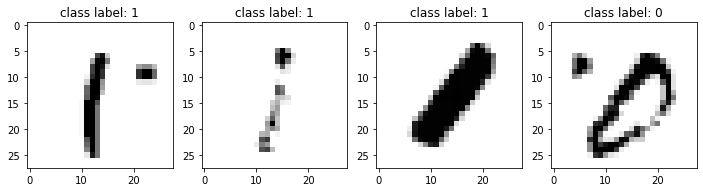

In [ ]:
miss_idx = np.where(y_test_01 != y_pred)[0]
print(miss_idx)
fig, axes = plt.subplots(nrows=1,ncols=len(miss_idx),figsize=(12,8))

for i in range(len(miss_idx)):
  axes[i].imshow(X_test_01[miss_idx[i],:-1].reshape((height,width)),cmap='gray_r')
  axes[i].set_title(f"class label: {int(1+y_test_01[miss_idx[i]]/2)}")

plt.show()